In [9]:
import json
import requests
from bs4 import BeautifulSoup
import re
from pprint import pprint
import pandas as pd

In [10]:
#testing by scraping all Test matches in 2023

my_url = "https://www.espncricinfo.com/records/year/team-match-results/2023-2023/test-matches-1"
raw_html = requests.get(my_url).content

In [11]:
soup_doc = BeautifulSoup(raw_html, "html.parser")
soup_doc

<!DOCTYPE html>
<html lang="en"><head><meta charset="utf-8"/><link crossorigin="anonymous" href="https://img1.hscicdn.com" rel="preconnect"/><link crossorigin="anonymous" href="https://dcf.espn.com" rel="preconnect"/><link as="font" crossorigin="anonymous" href="https://wassets.hscicdn.com/static/fonts/CiIcons/ci-icons-v2.23/fonts/icomoon.woff?gencn3" rel="preload" type="font/woff2"/><link as="font" crossorigin="anonymous" href="https://wassets.hscicdn.com/static/fonts/BentonSans/BentonSans-Bold/BentonSans-Bold.woff" rel="preload" type="font/woff"/><link as="font" crossorigin="anonymous" href="https://wassets.hscicdn.com/static/fonts/BentonSans/BentonSans-Regular/BentonSans-Regular.woff" rel="preload" type="font/woff"/><link as="font" crossorigin="anonymous" href="https://wassets.hscicdn.com/static/fonts/BentonSans/BentonSans-Medium/BentonSans-Medium.woff" rel="preload" type="font/woff"/><script type="text/javascript">
          /*! js-cookie v3.0.5 | MIT */
          !function(e,t){"o

In [12]:
#testing by scraping all Test matches in 2023

results = []
rows = soup_doc.find_all('tr')

for row in rows:
    spans = row.find_all('span', class_="")
    if len(spans) >= 3:
        result = spans[2]
        results.append(result)

results

[<span class="">South Africa</span>,
 <span class="">Australia</span>,
 <span class="">Australia</span>,
 <span class="">New Zealand</span>,
 <span class="">Bangladesh</span>,
 <span class="">England</span>,
 <span class="">Pakistan</span>,
 <span class="">drawn</span>,
 <span class="">drawn</span>,
 <span class="">Pakistan</span>,
 <span class="">India</span>,
 <span class="">England</span>,
 <span class="">Australia</span>,
 <span class="">Australia</span>,
 <span class="">Bangladesh</span>,
 <span class="">Australia</span>,
 <span class="">England</span>,
 <span class="">Sri Lanka</span>,
 <span class="">Sri Lanka</span>,
 <span class="">Bangladesh</span>,
 <span class="">New Zealand</span>,
 <span class="">drawn</span>,
 <span class="">New Zealand</span>,
 <span class="">South Africa</span>,
 <span class="">Australia</span>,
 <span class="">South Africa</span>,
 <span class="">New Zealand</span>,
 <span class="">India</span>,
 <span class="">England</span>,
 <span class="">West Ind

In [13]:
#scraping all Test matches (from the first Test match ever played, in 1877, to the last match of 2023)

year_urls = []
for year in range(1877, 2024):
    year_url = "https://www.espncricinfo.com/records/year/team-match-results/"+str(year)+"-"+str(year)+"/test-matches-1"
    year_urls.append({"year": year, "url": year_url})

year_urls

[{'year': 1877,
  'url': 'https://www.espncricinfo.com/records/year/team-match-results/1877-1877/test-matches-1'},
 {'year': 1878,
  'url': 'https://www.espncricinfo.com/records/year/team-match-results/1878-1878/test-matches-1'},
 {'year': 1879,
  'url': 'https://www.espncricinfo.com/records/year/team-match-results/1879-1879/test-matches-1'},
 {'year': 1880,
  'url': 'https://www.espncricinfo.com/records/year/team-match-results/1880-1880/test-matches-1'},
 {'year': 1881,
  'url': 'https://www.espncricinfo.com/records/year/team-match-results/1881-1881/test-matches-1'},
 {'year': 1882,
  'url': 'https://www.espncricinfo.com/records/year/team-match-results/1882-1882/test-matches-1'},
 {'year': 1883,
  'url': 'https://www.espncricinfo.com/records/year/team-match-results/1883-1883/test-matches-1'},
 {'year': 1884,
  'url': 'https://www.espncricinfo.com/records/year/team-match-results/1884-1884/test-matches-1'},
 {'year': 1885,
  'url': 'https://www.espncricinfo.com/records/year/team-match-r

In [14]:
for year in year_urls:
    print(year['url'])

https://www.espncricinfo.com/records/year/team-match-results/1877-1877/test-matches-1
https://www.espncricinfo.com/records/year/team-match-results/1878-1878/test-matches-1
https://www.espncricinfo.com/records/year/team-match-results/1879-1879/test-matches-1
https://www.espncricinfo.com/records/year/team-match-results/1880-1880/test-matches-1
https://www.espncricinfo.com/records/year/team-match-results/1881-1881/test-matches-1
https://www.espncricinfo.com/records/year/team-match-results/1882-1882/test-matches-1
https://www.espncricinfo.com/records/year/team-match-results/1883-1883/test-matches-1
https://www.espncricinfo.com/records/year/team-match-results/1884-1884/test-matches-1
https://www.espncricinfo.com/records/year/team-match-results/1885-1885/test-matches-1
https://www.espncricinfo.com/records/year/team-match-results/1886-1886/test-matches-1
https://www.espncricinfo.com/records/year/team-match-results/1887-1887/test-matches-1
https://www.espncricinfo.com/records/year/team-match-r

In [15]:
all_results = []

for year_url in year_urls:
    
    try:
        url = year_url['url']
        raw_html = requests.get(url).content
        soup_doc = BeautifulSoup(raw_html, "html.parser")
        year_results = []
        rows = soup_doc.find_all('tr')
        for row in rows:
            spans = row.find_all('span', class_="")
            if len(spans) >= 4:
                result = spans[2].get_text()
                year_results.append(result)
        print(year_results)
        
    except Exception as e:
        print(f'An error occurred: {e}')
        
    all_results.append({"year": year_url['year'], "results": year_results})

['England', 'Australia']
[]
['Australia']
['England']
['drawn']
['Australia', 'Australia', 'drawn', 'Australia', 'Australia']
['Australia', 'England', 'England']
['England', 'drawn', 'England', 'drawn']
['England', 'Australia', 'Australia', 'England']
['England', 'England', 'England']
['England', 'England']
['England', 'England', 'Australia', 'England']
['England', 'England']
['England', 'England']
[]
['England', 'England', 'Australia', 'Australia']
['drawn', 'England', 'drawn']
['England', 'England']
['England', 'Australia', 'Australia']
['England', 'Australia', 'England', 'England', 'England', 'England']
['England']
['Australia', 'Australia', 'Australia', 'Australia']
['drawn', 'drawn', 'drawn', 'Australia', 'drawn', 'England', 'England']
[]
['England']
['Australia', 'Australia', 'drawn', 'England', 'Australia', 'Australia', 'drawn', 'drawn', 'Australia', 'Australia', 'Australia', 'Australia']
['England']
['Australia', 'England', 'Australia', 'England']
['drawn', 'England', 'drawn', 

In [17]:
all_results

[{'year': 1877, 'results': ['England', 'Australia']},
 {'year': 1878, 'results': []},
 {'year': 1879, 'results': ['Australia']},
 {'year': 1880, 'results': ['England']},
 {'year': 1881, 'results': ['drawn']},
 {'year': 1882,
  'results': ['Australia', 'Australia', 'drawn', 'Australia', 'Australia']},
 {'year': 1883, 'results': ['Australia', 'England', 'England']},
 {'year': 1884, 'results': ['England', 'drawn', 'England', 'drawn']},
 {'year': 1885, 'results': ['England', 'Australia', 'Australia', 'England']},
 {'year': 1886, 'results': ['England', 'England', 'England']},
 {'year': 1887, 'results': ['England', 'England']},
 {'year': 1888, 'results': ['England', 'England', 'Australia', 'England']},
 {'year': 1889, 'results': ['England', 'England']},
 {'year': 1890, 'results': ['England', 'England']},
 {'year': 1891, 'results': []},
 {'year': 1892, 'results': ['England', 'England', 'Australia', 'Australia']},
 {'year': 1893, 'results': ['drawn', 'England', 'drawn']},
 {'year': 1894, 'resu

In [18]:
df = pd.DataFrame(all_results)

df

,year,results
0,1877,"[England, Australia]"
1,1878,[]
2,1879,[Australia]
3,1880,[England]
4,1881,[drawn]
...,...,...
142,2019,"[South Africa, Australia, Pakistan, Australia,..."
143,2020,"[South Africa, India, New Zealand, Australia, ..."
144,2021,"[India, Australia, Australia, Australia, Pakis..."
145,2022,"[drawn, Australia, India, England, Australia, ..."


In [19]:
df = df.explode('results')
df

,year,results
0,1877,England
0,1877,Australia
1,1878,NaN
2,1879,Australia
3,1880,England
...,...,...
146,2023,West Indies
146,2023,India
146,2023,drawn
146,2023,drawn


In [20]:
df.to_csv('all_test_match_results.csv', index=False)

In [21]:
all_tests = pd.read_csv('all_test_match_results.csv')
all_tests.head(50)

,year,results
0,1877,England
1,1877,Australia
2,1878,NaN
3,1879,Australia
4,1880,England
5,1881,drawn
6,1882,Australia
7,1882,Australia
8,1882,drawn
9,1882,Australia


In [22]:
count_results = df.groupby('year')['results'].agg(number_of_matches='count', number_of_draws=lambda x: x.eq('drawn').sum()).reset_index()

print(count_results)

     year  number_of_matches  number_of_draws
0    1877                  2                0
1    1878                  0                0
2    1879                  1                0
3    1880                  1                0
4    1881                  1                1
..    ...                ...              ...
142  2019                 39                4
143  2020                 22                3
144  2021                 44                7
145  2022                 43                7
146  2023                 34                6

[147 rows x 3 columns]


In [23]:
count_results['draw_percentage'] = round((count_results['number_of_draws'] / count_results['number_of_matches']) * 100, 1)

count_results.head(20)

,year,number_of_matches,number_of_draws,draw_percentage
0,1877,2,0,0.0
1,1878,0,0,NaN
2,1879,1,0,0.0
3,1880,1,0,0.0
4,1881,1,1,100.0
5,1882,5,1,20.0
6,1883,3,0,0.0
7,1884,4,2,50.0
8,1885,4,0,0.0
9,1886,3,0,0.0


In [24]:
count_results.to_csv('results_versus_draws.csv', index=False)

In [25]:
import matplotlib.pyplot as plt

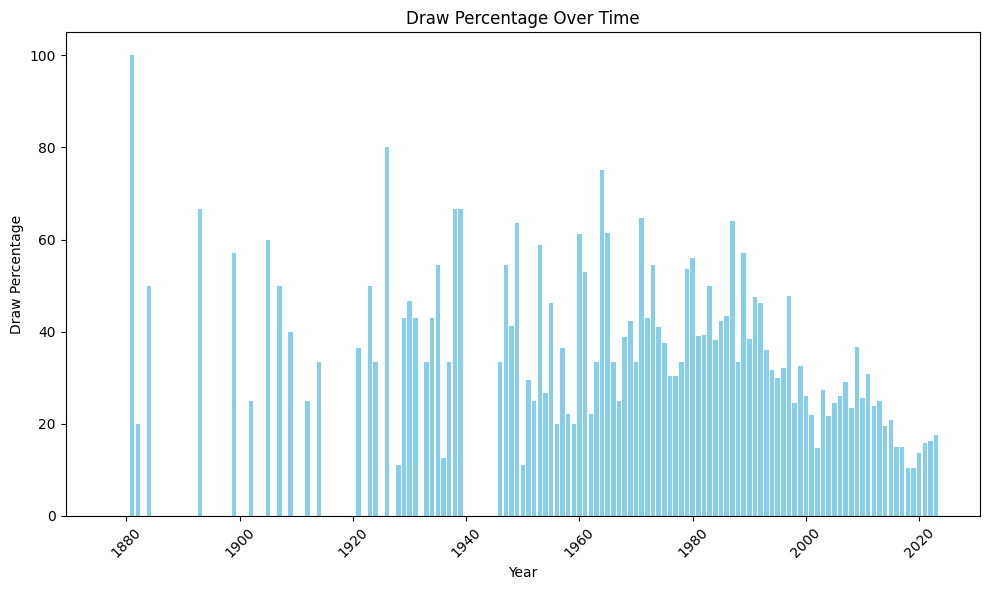

In [26]:
plt.figure(figsize=(10, 6))
plt.bar(count_results['year'], count_results['draw_percentage'], color='skyblue')

plt.xlabel('Year')
plt.ylabel('Draw Percentage')
plt.title('Draw Percentage Over Time')

plt.xticks(rotation=45) 
plt.tight_layout()
plt.show()

In [27]:
count_results['decade'] = (count_results['year'] // 10) * 10
count_results

,year,number_of_matches,number_of_draws,draw_percentage,decade
0,1877,2,0,0.0,1870
1,1878,0,0,NaN,1870
2,1879,1,0,0.0,1870
3,1880,1,0,0.0,1880
4,1881,1,1,100.0,1880
...,...,...,...,...,...
142,2019,39,4,10.3,2010
143,2020,22,3,13.6,2020
144,2021,44,7,15.9,2020
145,2022,43,7,16.3,2020


In [28]:
avg_draw_percentage = count_results.groupby('year')['draw_percentage'].mean().round(1)
avg_draw_percentage

year
1877      0.0
1878      NaN
1879      0.0
1880      0.0
1881    100.0
        ...  
2019     10.3
2020     13.6
2021     15.9
2022     16.3
2023     17.6
Name: draw_percentage, Length: 147, dtype: float64

In [32]:
matches_per_decade = count_results.groupby('decade')['number_of_matches'].sum()
matches_per_decade

decade
1870      3
1880     29
1890     32
1900     41
1910     29
1920     51
1930     89
1940     45
1950    164
1960    186
1970    198
1980    266
1990    347
2000    464
2010    433
2020    143
Name: number_of_matches, dtype: int64

In [35]:
draw_percentage_per_decade = count_results.groupby('decade')['draw_percentage'].mean().fillna(0).round(1)

draw_percentage_per_decade

decade
1870     0.0
1880    17.0
1890    13.8
1900    19.4
1910    11.7
1920    25.4
1930    40.0
1940    48.2
1950    29.6
1960    44.6
1970    42.2
1980    46.3
1990    36.7
2000    25.1
2010    19.6
2020    15.8
Name: draw_percentage, dtype: float64

In [41]:
matches_drawn_by_decade = pd.merge(matches_per_decade, draw_percentage_per_decade, on='decade')

matches_drawn_by_decade.columns = ['total_matches', 'draw_percentage']

matches_drawn_by_decade

,total_matches,draw_percentage
decade,,
1870,3,0.0
1880,29,17.0
1890,32,13.8
1900,41,19.4
1910,29,11.7
1920,51,25.4
1930,89,40.0
1940,45,48.2
1950,164,29.6


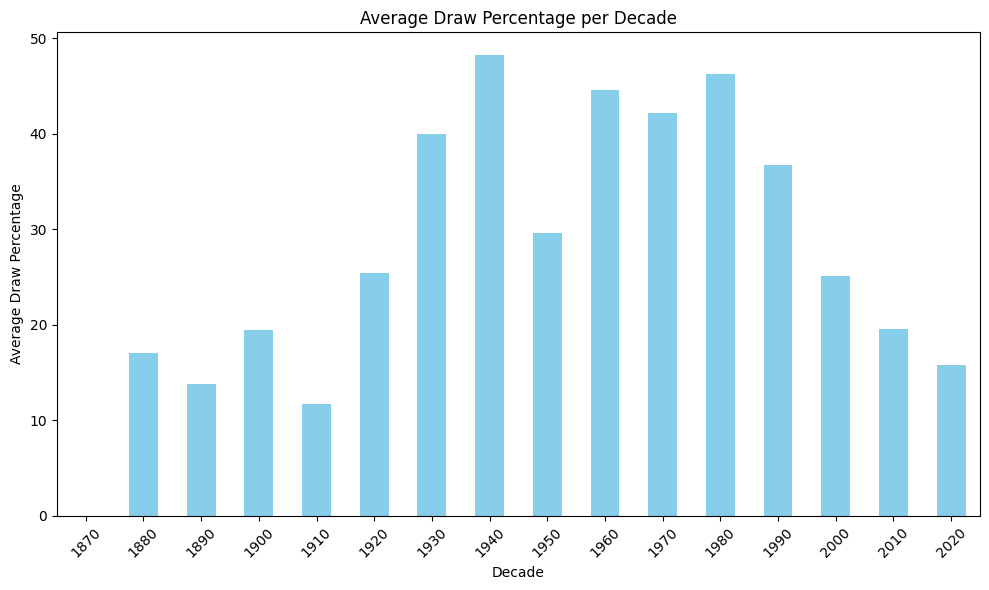

In [42]:
plt.figure(figsize=(10, 6))
draw_percentage_per_decade.plot(kind='bar', color='skyblue')

plt.xlabel('Decade')
plt.ylabel('Average Draw Percentage')
plt.title('Average Draw Percentage per Decade')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [44]:
matches_drawn_by_decade.to_csv('matches_drawn_by_decade.csv')

In [47]:
victory_margins = []

for year_url in year_urls:
    
    try:
        url = year_url['url']
        raw_html = requests.get(url).content
        soup_doc = BeautifulSoup(raw_html, "html.parser")
        year_margins = []
        rows = soup_doc.find_all('tr')
        for row in rows:
            spans = row.find_all('span', class_="")
            if len(spans) >= 4:
                margin = spans[3].get_text()
                year_margins.append(margin)
        print(year_margins)
        
    except Exception as e:
        print(f'An error occurred: {e}')
        
    victory_margins.append({"year": year_url['year'], "margin": year_margins})

['4 wickets', '45 runs']
[]
['10 wickets']
['5 wickets']
['-']
['9 wickets', '7 runs', '-', '6 wickets', '5 wickets']
['4 wickets', '69 runs', 'inns & 27 runs']
['8 wickets', '-', 'inns & 5 runs', '-']
['inns & 98 runs', '8 wickets', '6 runs', '10 wickets']
['inns & 217 runs', 'inns & 106 runs', '4 wickets']
['71 runs', '13 runs']
['inns & 21 runs', 'inns & 137 runs', '61 runs', '126 runs']
['inns & 202 runs', '8 wickets']
['2 wickets', '7 wickets']
[]
['inns & 230 runs', 'inns & 189 runs', '72 runs', '54 runs']
['-', 'inns & 43 runs', '-']
['94 runs', '10 runs']
['6 wickets', 'inns & 147 runs', '382 runs']
['66 runs', '3 wickets', '6 wickets', 'inns & 33 runs', 'inns & 197 runs', '288 runs']
['9 wickets']
['6 wickets', '8 wickets', 'inns & 13 runs', 'inns & 55 runs']
['-', '-', '-', '10 wickets', '-', '210 runs', '32 runs']
[]
['inns & 124 runs']
['10 wickets', '159 runs', '-', '1 wicket', '3 runs', '143 runs', '-', '-', '32 runs', '7 wickets', '4 wickets', '229 runs']
['5 wickets']
[

In [48]:
victory_margins

[{'year': 1877, 'margin': ['4 wickets', '45 runs']},
 {'year': 1878, 'margin': []},
 {'year': 1879, 'margin': ['10 wickets']},
 {'year': 1880, 'margin': ['5 wickets']},
 {'year': 1881, 'margin': ['-']},
 {'year': 1882,
  'margin': ['9 wickets', '7 runs', '-', '6 wickets', '5 wickets']},
 {'year': 1883, 'margin': ['4 wickets', '69 runs', 'inns & 27 runs']},
 {'year': 1884, 'margin': ['8 wickets', '-', 'inns & 5 runs', '-']},
 {'year': 1885,
  'margin': ['inns & 98 runs', '8 wickets', '6 runs', '10 wickets']},
 {'year': 1886, 'margin': ['inns & 217 runs', 'inns & 106 runs', '4 wickets']},
 {'year': 1887, 'margin': ['71 runs', '13 runs']},
 {'year': 1888,
  'margin': ['inns & 21 runs', 'inns & 137 runs', '61 runs', '126 runs']},
 {'year': 1889, 'margin': ['inns & 202 runs', '8 wickets']},
 {'year': 1890, 'margin': ['2 wickets', '7 wickets']},
 {'year': 1891, 'margin': []},
 {'year': 1892,
  'margin': ['inns & 230 runs', 'inns & 189 runs', '72 runs', '54 runs']},
 {'year': 1893, 'margin': 

In [49]:
margins_df = pd.DataFrame(victory_margins)

margins_df

,year,margin
0,1877,"[4 wickets, 45 runs]"
1,1878,[]
2,1879,[10 wickets]
3,1880,[5 wickets]
4,1881,[-]
...,...,...
142,2019,"[107 runs, 247 runs, 263 runs, 296 runs, -, in..."
143,2020,"[inns & 45 runs, 8 wickets, 101 runs, 8 wicket..."
144,2021,"[113 runs, inns & 14 runs, 275 runs, 9 wickets..."
145,2022,"[-, inns & 182 runs, 3 wickets, 8 wickets, 6 w..."


In [50]:
margins_df['decade'] = (margins_df['year'] // 10) * 10
margins_df

,year,margin,decade
0,1877,"[4 wickets, 45 runs]",1870
1,1878,[],1870
2,1879,[10 wickets],1870
3,1880,[5 wickets],1880
4,1881,[-],1880
...,...,...,...
142,2019,"[107 runs, 247 runs, 263 runs, 296 runs, -, in...",2010
143,2020,"[inns & 45 runs, 8 wickets, 101 runs, 8 wicket...",2020
144,2021,"[113 runs, inns & 14 runs, 275 runs, 9 wickets...",2020
145,2022,"[-, inns & 182 runs, 3 wickets, 8 wickets, 6 w...",2020


In [51]:
margins_df = margins_df.explode('margin')
margins_df.head(20)

,year,margin,decade
0,1877,4 wickets,1870
0,1877,45 runs,1870
1,1878,NaN,1870
2,1879,10 wickets,1870
3,1880,5 wickets,1880
4,1881,-,1880
5,1882,9 wickets,1880
5,1882,7 runs,1880
5,1882,-,1880
5,1882,6 wickets,1880


In [54]:
margins_df.to_csv('victory_margins.csv', index=False)

In [60]:
all_tests_reset = all_tests.reset_index(drop=True)
margins_df_reset = margins_df.reset_index(drop=True)

margins_df_reset.rename(columns={'year': 'margins_year'}, inplace=True)

combined_df = pd.concat([all_tests_reset, margins_df_reset], axis=1)

combined_df

,year,results,margins_year,margin,decade
0,1877,England,1877,4 wickets,1870
1,1877,Australia,1877,45 runs,1870
2,1878,NaN,1878,NaN,1870
3,1879,Australia,1879,10 wickets,1870
4,1880,England,1880,5 wickets,1880
...,...,...,...,...,...
2529,2023,West Indies,2023,inns & 4 runs,2020
2530,2023,India,2023,inns & 132 runs,2020
2531,2023,drawn,2023,-,2020
2532,2023,drawn,2023,-,2020


In [61]:
for index, row in combined_df.iterrows():
    
    results_str = str(row['results'])
    margin_str = str(row['margin'])

    if "inns" in margin_str:
        combined_df.at[index, 'score'] = 2
    elif results_str.startswith('tied'):
        combined_df.at[index, 'score'] = 10
    elif margin_str.startswith('-'):
        combined_df.at[index, 'score'] = 1
    elif "run" in margin_str and "inn" not in margin_str:
        runs_margin = int(re.findall(r'\d+', margin_str)[0]) if re.findall(r'\d+', margin_str) else None
        if runs_margin < 25:
            combined_df.at[index, 'score'] = 9
        elif runs_margin < 50:
            combined_df.at[index, 'score'] = 8
        elif runs_margin < 100:
            combined_df.at[index, 'score'] = 7
        elif runs_margin < 150:
            combined_df.at[index, 'score'] = 6
        elif runs_margin < 200:
            combined_df.at[index, 'score'] = 5
        elif runs_margin >= 200:
            combined_df.at[index, 'score'] = 4
    elif "wicket" in margin_str and "inn" not in margin_str:
        wicket_margin = int(re.findall(r'\d+', margin_str)[0]) if re.findall(r'\d+', margin_str) else None
        if wicket_margin == 1:
            combined_df.at[index, 'score'] = 9
        elif wicket_margin == 2:
            combined_df.at[index, 'score'] = 8
        elif wicket_margin == 3 or wicket_margin == 4:
            combined_df.at[index, 'score'] = 7
        elif wicket_margin == 5 or wicket_margin == 6:
            combined_df.at[index, 'score'] = 6
        elif wicket_margin == 7 or wicket_margin == 8:
            combined_df.at[index, 'score'] = 5
        elif wicket_margin == 9 or wicket_margin == 10:
            combined_df.at[index, 'score'] = 4
    else:
        combined_df.at[index, 'score'] = None
            
combined_df

,year,results,margins_year,margin,decade,score
0,1877,England,1877,4 wickets,1870,7.0
1,1877,Australia,1877,45 runs,1870,8.0
2,1878,NaN,1878,NaN,1870,NaN
3,1879,Australia,1879,10 wickets,1870,4.0
4,1880,England,1880,5 wickets,1880,6.0
...,...,...,...,...,...,...
2529,2023,West Indies,2023,inns & 4 runs,2020,2.0
2530,2023,India,2023,inns & 132 runs,2020,2.0
2531,2023,drawn,2023,-,2020,1.0
2532,2023,drawn,2023,-,2020,1.0


In [62]:
combined_df.to_csv('complete_datasheet.csv', index=False)

In [63]:
avg_closeness_score_decade = combined_df.groupby('decade')['score'].mean().round(1)
avg_closeness_score_decade

decade
1870    6.3
1880    4.4
1890    4.1
1900    4.4
1910    4.3
1920    3.5
1930    2.7
1940    2.4
1950    3.3
1960    2.9
1970    3.1
1980    2.9
1990    3.4
2000    3.6
2010    3.9
2020    4.0
Name: score, dtype: float64

In [71]:
avg_closeness_score_decade.to_csv('avg_closeness_score_decade.csv')

In [65]:
matches_in_decade = combined_df.groupby('decade').size()
matches_in_decade

decade
1870      4
1880     29
1890     33
1900     42
1910     34
1920     51
1930     89
1940     51
1950    164
1960    186
1970    198
1980    266
1990    347
2000    464
2010    433
2020    143
dtype: int64

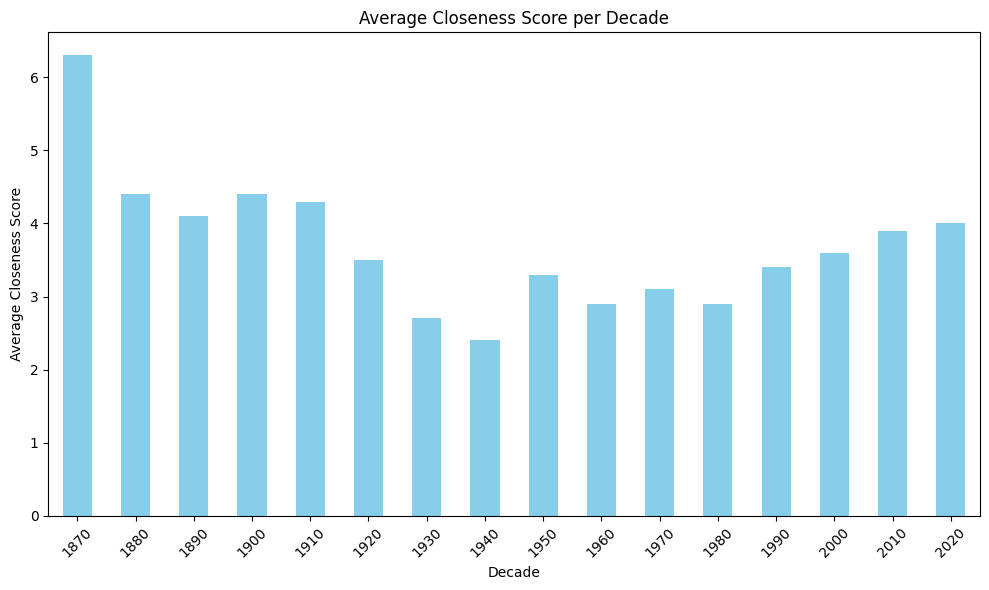

In [392]:
plt.figure(figsize=(10, 6))
avg_closeness_score_decade.plot(kind='bar', color='skyblue')

plt.xlabel('Decade')
plt.ylabel('Average Closeness Score')
plt.title('Average Closeness Score per Decade')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [66]:
combined_df

,year,results,margins_year,margin,decade,score
0,1877,England,1877,4 wickets,1870,7.0
1,1877,Australia,1877,45 runs,1870,8.0
2,1878,NaN,1878,NaN,1870,NaN
3,1879,Australia,1879,10 wickets,1870,4.0
4,1880,England,1880,5 wickets,1880,6.0
...,...,...,...,...,...,...
2529,2023,West Indies,2023,inns & 4 runs,2020,2.0
2530,2023,India,2023,inns & 132 runs,2020,2.0
2531,2023,drawn,2023,-,2020,1.0
2532,2023,drawn,2023,-,2020,1.0


In [67]:
mean_scores = []

for year in range(1877, 2024):
    df_year = combined_df[combined_df['year'] == year]
    mean_score = df_year['score'].mean()
    mean_score_rounded = round(mean_score, 1)
    mean_scores.append({"year": year, "average_score": mean_score_rounded})

mean_scores

[{'year': 1877, 'average_score': 7.5},
 {'year': 1878, 'average_score': nan},
 {'year': 1879, 'average_score': 4.0},
 {'year': 1880, 'average_score': 6.0},
 {'year': 1881, 'average_score': 1.0},
 {'year': 1882, 'average_score': 5.2},
 {'year': 1883, 'average_score': 5.3},
 {'year': 1884, 'average_score': 2.2},
 {'year': 1885, 'average_score': 5.0},
 {'year': 1886, 'average_score': 3.7},
 {'year': 1887, 'average_score': 8.0},
 {'year': 1888, 'average_score': 4.2},
 {'year': 1889, 'average_score': 3.5},
 {'year': 1890, 'average_score': 6.5},
 {'year': 1891, 'average_score': nan},
 {'year': 1892, 'average_score': 4.5},
 {'year': 1893, 'average_score': 1.3},
 {'year': 1894, 'average_score': 8.0},
 {'year': 1895, 'average_score': 4.0},
 {'year': 1896, 'average_score': 4.7},
 {'year': 1897, 'average_score': 4.0},
 {'year': 1898, 'average_score': 3.8},
 {'year': 1899, 'average_score': 2.9},
 {'year': 1900, 'average_score': nan},
 {'year': 1901, 'average_score': 2.0},
 {'year': 1902, 'average_

In [68]:
average_closeness_score_year = pd.DataFrame(mean_scores)
average_closeness_score_year

,year,average_score
0,1877,7.5
1,1878,NaN
2,1879,4.0
3,1880,6.0
4,1881,1.0
...,...,...
142,2019,3.7
143,2020,3.7
144,2021,4.0
145,2022,4.0


In [406]:
average_closeness_score_year.to_csv('average_closeness_score_year.csv', index=False)

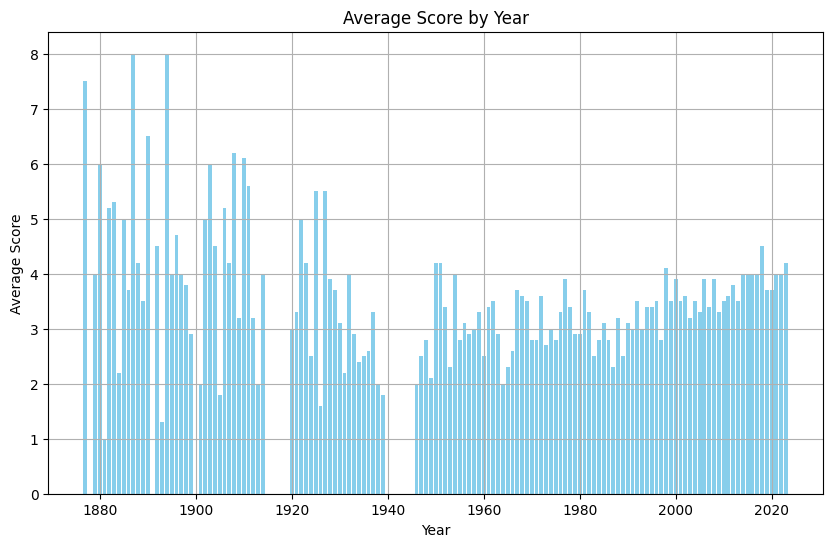

In [69]:
plt.figure(figsize=(10, 6))
plt.bar(average_closeness_score_year['year'], average_closeness_score_year['average_score'], color='skyblue')
plt.xlabel('Year')
plt.ylabel('Average Score')
plt.title('Average Score by Year')
plt.grid(True)
plt.show()

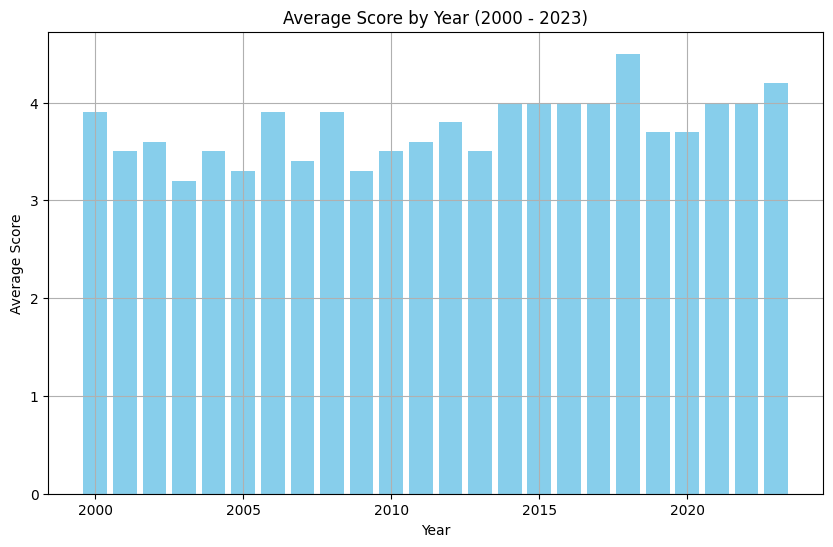

In [70]:
plt.figure(figsize=(10, 6))

#filtering the DataFrame for years from 2000 to 2023
filtered_df = average_closeness_score_year[(average_closeness_score_year['year'] >= 2000) & (average_closeness_score_year['year'] <= 2023)]

plt.bar(filtered_df['year'], filtered_df['average_score'], color='skyblue')
plt.xlabel('Year')
plt.ylabel('Average Score')
plt.title('Average Score by Year (2000 - 2023)')
plt.grid(True)
plt.show()